# AirBnb Listing Analysis

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

In [2]:
# Importing the listings file
data = pd.read_csv('Listings.csv', low_memory = False)

In [3]:
data.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃ‚Â² Paris (Sacre CÃ…â€œur),10328771,11/29/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
data.shape

(279712, 33)

In [5]:
data.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [6]:
data['host_since'] = pd.to_datetime(data['host_since'])

In [24]:
sub_data = data[data['city'] == 'Paris']

In [25]:
sub_data.shape

(64690, 33)

In [26]:
sub_data = sub_data[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [42]:
sub_data.shape

(64690, 6)

In [27]:
sub_data.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


## Exploring Data Analysis

### Checking the Paris Listing data

In [28]:
# Checking for missing_values
sub_data.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [29]:
# Obtaining summary statistics
sub_data[['accommodates', 'price']].describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


### Paris_Listings_Neighbourhood

In [33]:
# Group by 'neighbourhood' and calculate mean price
paris_listings_neighbourhood = sub_data.groupby('neighbourhood')['price'].mean().reset_index()

# Sort by mean price (low to high)
paris_listings_neighbourhood = paris_listings_neighbourhood.sort_values(by='price')

In [34]:
paris_listings_neighbourhood

,neighbourhood,price
10,Menilmontant,74.942257
2,Buttes-Chaumont,82.690182
3,Buttes-Montmartre,87.209479
17,Reuilly,89.058402
16,Popincourt,90.559459
6,Gobelins,98.110184
11,Observatoire,101.866801
0,Batignolles-Monceau,102.612702
5,Enclos-St-Laurent,102.967156
19,Vaugirard,106.831330


### Paris_listings_accomodations

In [35]:
# Identify the most expensive neighborhood
most_expensive_neighbourhood = sub_data.groupby('neighbourhood')['price'].mean().idxmax()

# Filter data for the most expensive neighborhood
filtered_df = sub_data[sub_data['neighbourhood'] == most_expensive_neighbourhood]

# Group by 'accommodates' and calculate the mean price
paris_listings_accommodations = filtered_df.groupby('accommodates')['price'].mean().reset_index()

# Sort by mean price (low to high)
paris_listings_accommodations = paris_listings_accommodations.sort_values(by='price')

paris_listings_accommodations

,accommodates,price
0,0,0.000000
1,1,79.522222
3,3,152.828767
2,2,155.103352
4,4,212.096070
5,5,328.817073
6,6,355.508571
8,8,405.518519
7,7,411.538462
9,9,440.272727


### Paris_listings_over_time

In [36]:
# Extract year from 'host_since'
sub_data['host_year'] = sub_data['host_since'].dt.year

# Group by 'host_year' and calculate the average price and count of new hosts
paris_listings_over_time = sub_data.groupby('host_year').agg(avg_price=('price', 'mean'),
                                                             new_hosts=('host_year', 'count')).reset_index()

paris_listings_over_time

,host_year,avg_price,new_hosts
0,2008.0,77.750000,4
1,2009.0,159.641509,106
2,2010.0,125.031250,416
3,2011.0,124.828230,1339
4,2012.0,111.578615,4592
5,2013.0,107.096414,8142
6,2014.0,100.253800,10922
7,2015.0,103.646250,12147
8,2016.0,114.159847,8871
9,2017.0,108.658888,4585


## Visualizations

### Average price by neighborhood

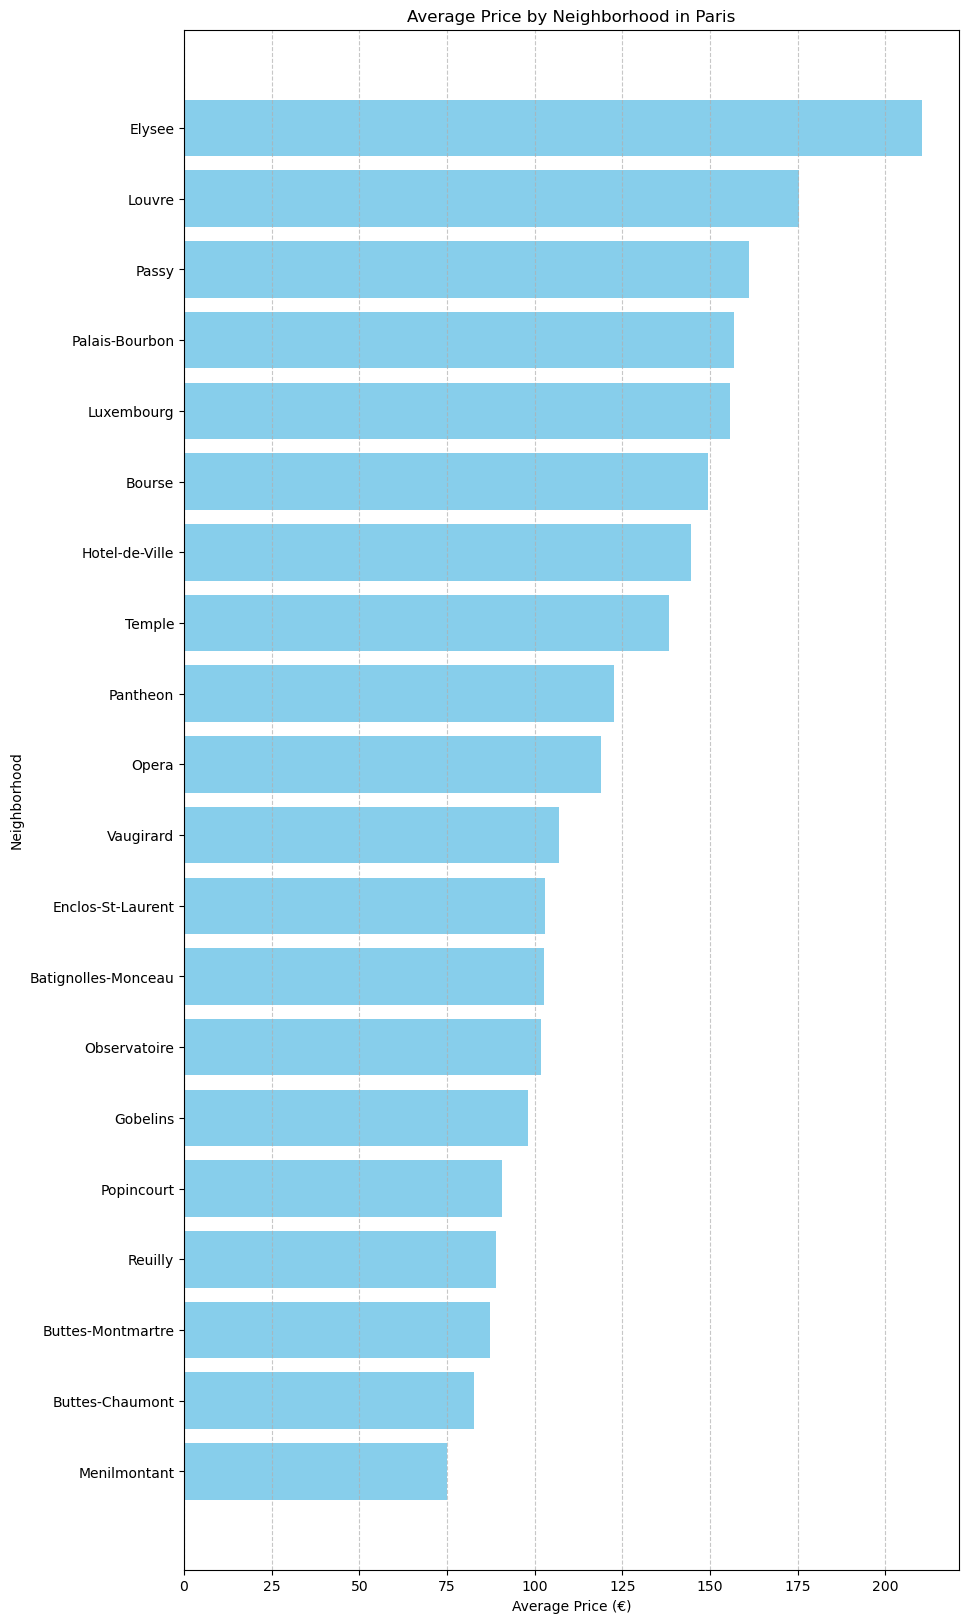

In [37]:
# Plotting
plt.figure(figsize=(10, 20))
plt.barh(paris_listings_neighbourhood['neighbourhood'], paris_listings_neighbourhood['price'], color='skyblue')
plt.xlabel('Average Price (€)')
plt.ylabel('Neighborhood')
plt.title('Average Price by Neighborhood in Paris')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()

### Average price by 'accomodates'

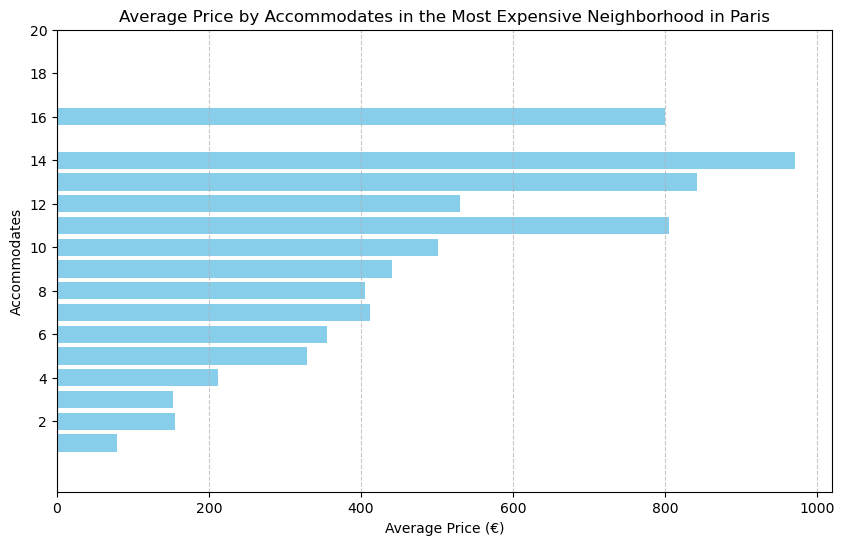

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(paris_listings_accommodations['accommodates'], paris_listings_accommodations['price'], color='skyblue')
plt.xlabel('Average Price (€)')
plt.ylabel('Accommodates')
plt.title('Average Price by Accommodates in the Most Expensive Neighborhood in Paris')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Setting specific values on the y-axis
plt.yticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])  # Add more values as needed

# Show plot
plt.show()

### Paris listings over time

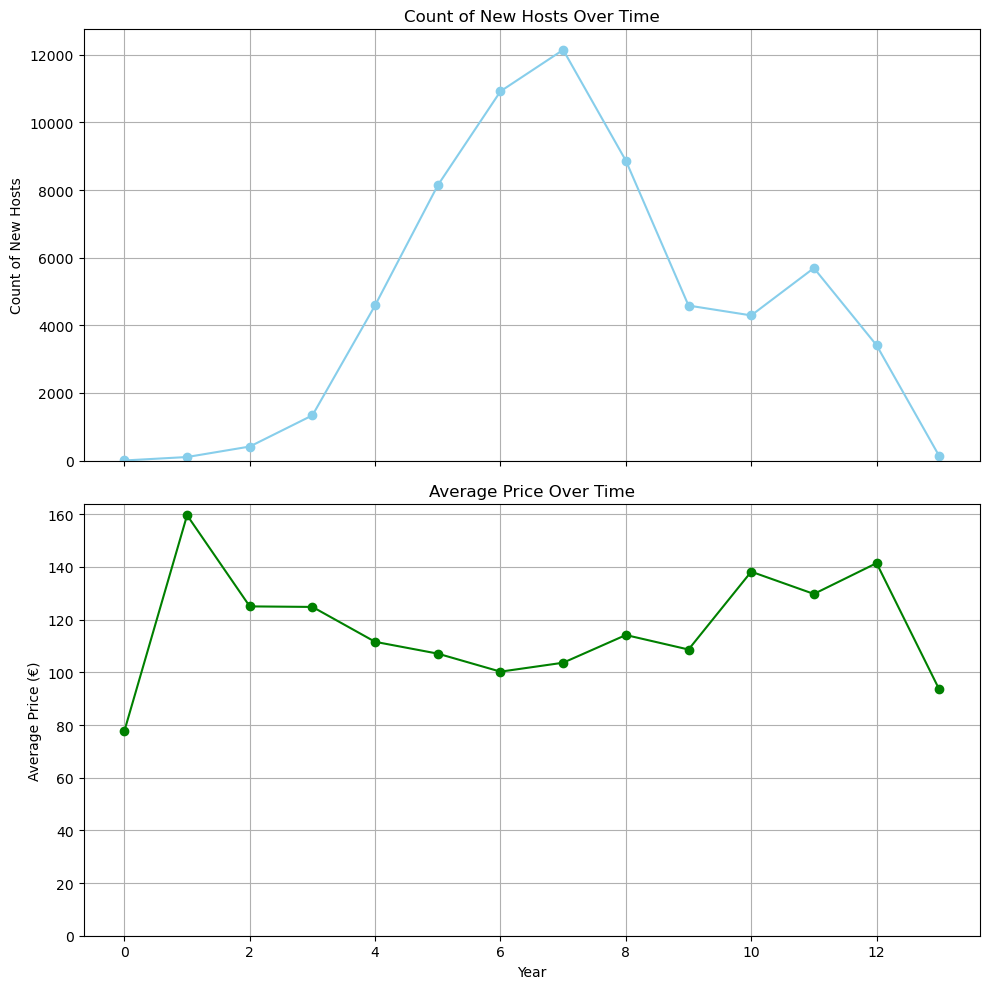

In [46]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Line chart for count of new hosts over time
ax[0].plot(paris_listings_over_time.index, paris_listings_over_time['new_hosts'], marker='o', linestyle='-', color='skyblue')
ax[0].set_ylabel('Count of New Hosts')
ax[0].set_ylim(0)
ax[0].set_title('Count of New Hosts Over Time')
ax[0].grid(True)

# Line chart for average price over time
ax[1].plot(paris_listings_over_time.index, paris_listings_over_time['avg_price'], marker='o', linestyle='-', color='green')
ax[1].set_ylabel('Average Price (€)')
ax[1].set_ylim(0)
ax[1].set_title('Average Price Over Time')
ax[1].grid(True)

plt.xlabel('Year')
plt.tight_layout()
plt.show()

### Dual- Axis

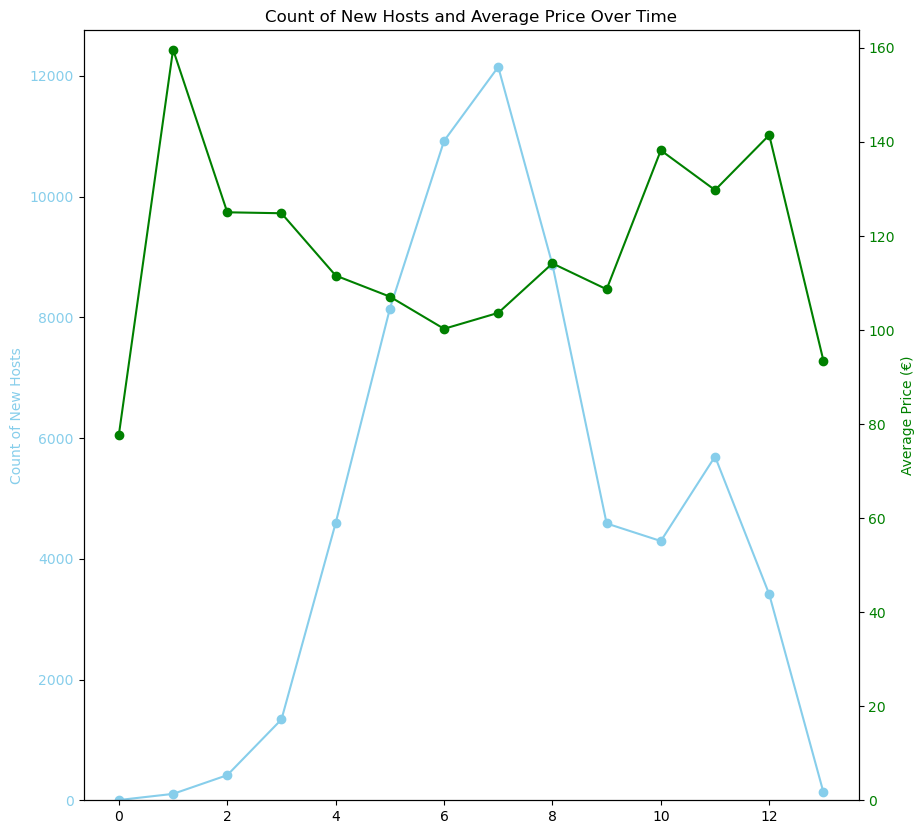

In [52]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 10))

# Line chart for count of new hosts over time
ax1.plot(paris_listings_over_time.index, paris_listings_over_time['new_hosts'], marker='o', linestyle='-', color='skyblue')
ax1.set_ylabel('Count of New Hosts', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_ylim(0)
ax1.set_title('Count of New Hosts and Average Price Over Time')

# creating dual axis
ax2 = ax1.twinx()

# Line chart for average price over time
ax2.plot(paris_listings_over_time.index, paris_listings_over_time['avg_price'], marker='o', linestyle='-', color='green')
ax2.set_ylabel('Average Price (€)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0)

# X-axis label
plt.xlabel('Year')
plt.show()